In [ ]:
%pip install numpy pandas scipy matplotlib seaborn scikit-learn statsmodels pmdarima xgboost prettytable

In [ ]:
!pip install -q condacolab

import condacolab
condacolab.install()

# pmdarima from conda-forge using Conda
!conda install -c conda-forge pmdarima -y

In [ ]:
! pip install pmdarima
import warnings
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math

In [8]:
train=pd.read_csv(r'train.csv')
features=pd.read_csv(r'features.csv')
stores = pd.read_csv(r'stores.csv')

In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [13]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [17]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [18]:
train.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [19]:
features.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [20]:
stores.isnull().sum()

,0
Store,0
Type,0
Size,0


In [21]:
data = train.merge(features, on=['Store', 'Date', 'IsHoliday'],
                   how='inner').merge(stores, on=['Store'], how='inner')
print(data.shape)

(421570, 16)


In [22]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [24]:
data = data[data['Weekly_Sales'] >= 0]

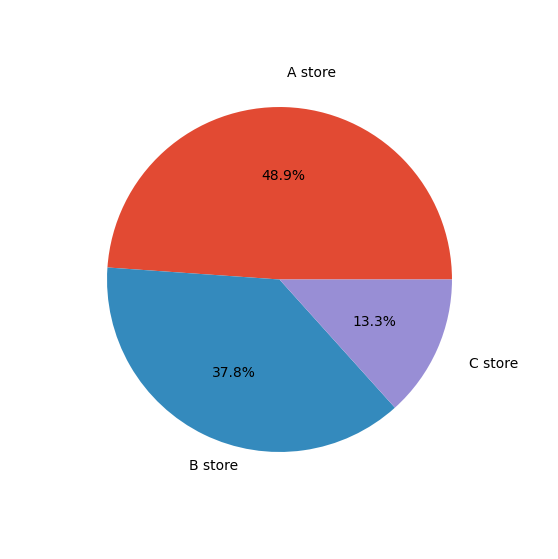

In [25]:
sorted_type = stores.groupby('Type')
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion
fig, axes = plt.subplots(1,1, figsize=(7,7))

axes.pie(sizes,
        labels=labels,
        explode=(0.0,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        radius=0.8,
        center=(0.5,0.5))
plt.show()

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

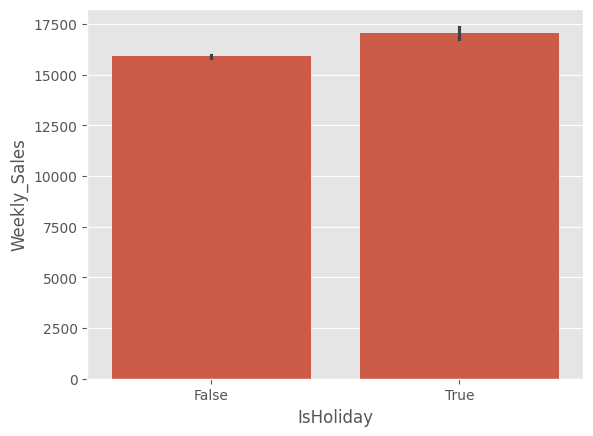

In [26]:
# Weekly Sales on Holidays
holiday = train['Weekly_Sales'].loc[train['IsHoliday']== True]

#Weekly Sales on Non-holidays.
non_holiday = train['Weekly_Sales'].loc[train['IsHoliday']== False]
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train)

In [27]:
data['MarkDown1'] = data['MarkDown1'].replace(np.nan, 0)
data['MarkDown2'] = data['MarkDown2'].replace(np.nan, 0)
data['MarkDown3'] = data['MarkDown3'].replace(np.nan, 0)
data['MarkDown4'] = data['MarkDown4'].replace(np.nan, 0)
data['MarkDown5'] = data['MarkDown5'].replace(np.nan, 0)

In [28]:
data=pd.get_dummies(data,columns=['Type'])

In [29]:
data['Date']= pd.to_datetime(data['Date'])

In [30]:
data['month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [31]:
data[['Date','month', 'Year']].head()

,Date,month,Year
0,2010-02-05,2,2010
1,2010-02-12,2,2010
2,2010-02-19,2,2010
3,2010-02-26,2,2010
4,2010-03-05,3,2010


In [32]:
data['dayofweek_name'] = data['Date'].dt.day_name()
data[['Date','dayofweek_name']].head()

,Date,dayofweek_name
0,2010-02-05,Friday
1,2010-02-12,Friday
2,2010-02-19,Friday
3,2010-02-26,Friday
4,2010-03-05,Friday


In [33]:
data['is_weekend'] = np.where(data['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
data[['Date','is_weekend']].head()

,Date,is_weekend
0,2010-02-05,0
1,2010-02-12,0
2,2010-02-19,0
3,2010-02-26,0
4,2010-03-05,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420285 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           420285 non-null  int64         
 1   Dept            420285 non-null  int64         
 2   Date            420285 non-null  datetime64[ns]
 3   Weekly_Sales    420285 non-null  float64       
 4   IsHoliday       420285 non-null  bool          
 5   Temperature     420285 non-null  float64       
 6   Fuel_Price      420285 non-null  float64       
 7   MarkDown1       420285 non-null  float64       
 8   MarkDown2       420285 non-null  float64       
 9   MarkDown3       420285 non-null  float64       
 10  MarkDown4       420285 non-null  float64       
 11  MarkDown5       420285 non-null  float64       
 12  CPI             420285 non-null  float64       
 13  Unemployment    420285 non-null  float64       
 14  Size            420285 non-null  int64   

In [35]:
data["IsHoliday"] = data["IsHoliday"].astype(int)
del data['dayofweek_name']
# del df['Date']

In [36]:
print(data.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0        42.31       2.572   
1      1     1 2010-02-12      46039.49          1        38.51       2.548   
2      1     1 2010-02-19      41595.55          0        39.93       2.514   
3      1     1 2010-02-26      19403.54          0        46.63       2.561   
4      1     1 2010-03-05      21827.90          0        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...  MarkDown5         CPI  Unemployment  \
0        0.0        0.0        0.0  ...        0.0  211.096358         8.106   
1        0.0        0.0        0.0  ...        0.0  211.242170         8.106   
2        0.0        0.0        0.0  ...        0.0  211.289143         8.106   
3        0.0        0.0        0.0  ...        0.0  211.319643         8.106   
4        0.0        0.0        0.0  ...        0.0  211.350143         8.106   

     Size  Type_A  Type_B  Type_C  month  Ye

In [39]:
data.to_csv('merged_data.csv', index=False)

In [40]:
df =  pd.read_csv(r"merged_data.csv",keep_default_na=False, na_values=[""])
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_A', 'Type_B',
       'Type_C', 'month', 'Year', 'is_weekend'],
      dtype='object')


In [41]:
X = df.loc[:, df.columns != 'Weekly_Sales']
y = df.loc[:, df.columns == 'Weekly_Sales']

X = X[["Store", "Dept", "Size", "IsHoliday", "CPI", "Temperature","Type_A","Type_B","Type_C","month","Year" ]]
y = y.values.reshape(-1, 1)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Store  Dept    Size  IsHoliday         CPI  Temperature  Type_A  Type_B  \
0      1     1  151315          0  211.096358        42.31    True   False   
1      1     1  151315          1  211.242170        38.51    True   False   
2      1     1  151315          0  211.289143        39.93    True   False   
3      1     1  151315          0  211.319643        46.63    True   False   
4      1     1  151315          0  211.350143        46.50    True   False   

   Type_C  month  Year  
0   False      2  2010  
1   False      2  2010  
2   False      2  2010  
3   False      2  2010  
4   False      3  2010  


In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_split=3,
                           min_samples_leaf=1)
rf.fit(X_train, y_train.ravel())
print('Accuracy:',rf.score(X_test, y_test.ravel())*100,'%')

y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rms)

print('MAE:',mean_absolute_error(y_test, y_pred))

Accuracy: 96.3725370495009 %
RMSE: 4350.035272286399
MAE: 1676.7053745371045


In [43]:
print('Training Accuracy:',rf.score(X_train, y_train.ravel())*100,'%')

Training Accuracy: 99.08306571214212 %


In [44]:
import xgboost as xgb
import warnings

In [45]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', nthread= 4,
                          n_estimators= 500, max_depth= 4, learning_rate= 0.5)
xg_reg.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [46]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

print('Accuracy:',xg_reg.score(X_test, y_test)*100,'%')

rms = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rms)

print('MAE:',mean_absolute_error(y_test, y_pred))

Accuracy: 93.60639585361112 %
RMSE: 5775.16182007897
MAE: 3049.258219773425


In [47]:
print('Training Accuracy:',xg_reg.score(X_train, y_train)*100,'%')

Training Accuracy: 94.28548771632208 %


In [48]:
df =  pd.read_csv("merged_data.csv",keep_default_na=False, na_values=[""])
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_A', 'Type_B',
       'Type_C', 'month', 'Year', 'is_weekend'],
      dtype='object')


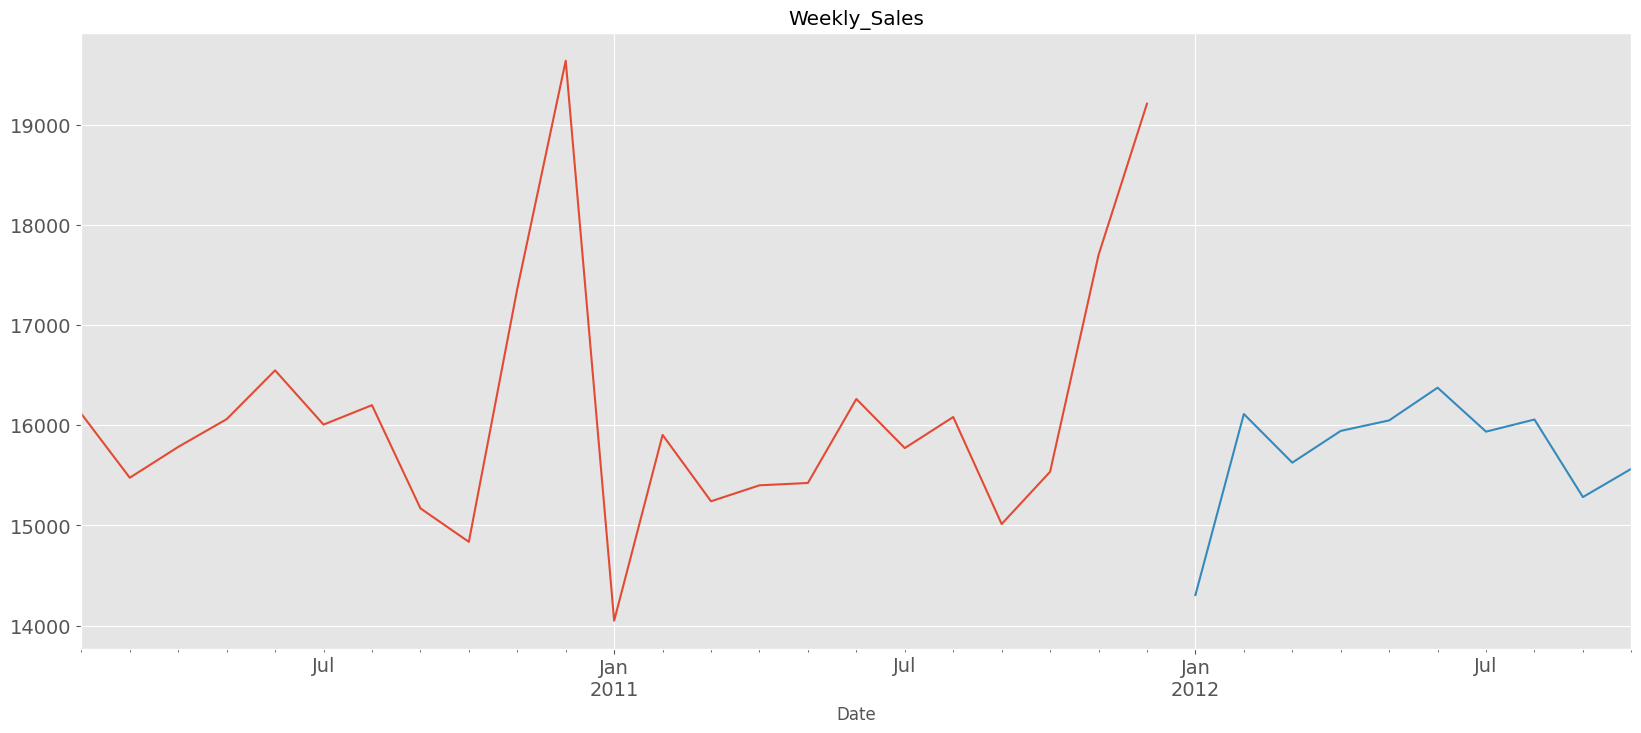

In [49]:
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date
df = df.drop('Date', axis=1)
df = df.resample('MS').mean()
# Resmapling the time series data with month starting first.
# Train-Test splitting of time series data
train_data = df[:int(0.7*(len(df)))]
test_data = df[int(0.7*(len(df))):]

train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [50]:
model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore',
                              suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0,
                              start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10,
                              seasonal=True,stepwise=False, suppress_warnings=True,
                              D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=405.580, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=398.029, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.847, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=399.604, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=513.059, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=401.739, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.280 seconds
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.029, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.604, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=399.331, Time=0.20 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.847, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.7

,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,True


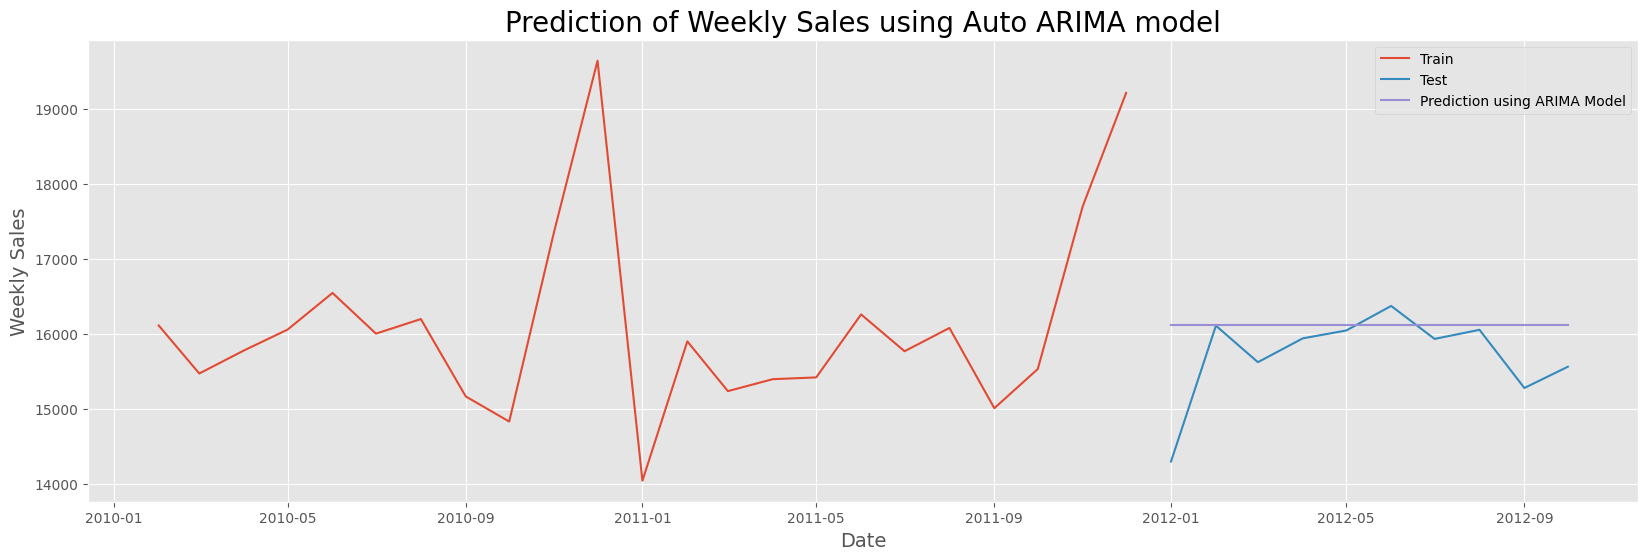

In [51]:
# Predicting the test values using predict function.
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')

plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [52]:
# Performance metric for ARIMA model
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))

Mean Squared Error (MSE) of ARIMA:  469971.08318421885
Root Mean Squared Error (RMSE) of ARIMA:  685.5443699602665
Mean Absolute Deviation (MAD) of ARIMA:  446.9938500521428


In [53]:
from prettytable import PrettyTable

tb = PrettyTable()
tb.field_names = ["Model" ,"Training Accuracy","Testing Accuracy","RMSE","MAE"]
tb.add_row(["Random Forest", 99.05, 96.6, 4202.24, 1665.78])
tb.add_row(["XgBoost", 94.17, 93.96, 5609.57, 3090.79])
tb.add_row(["Arima","-", "-", 685.54, "446.99 (MAD)" ])

print(tb)

+---------------+-------------------+------------------+---------+--------------+
|     Model     | Training Accuracy | Testing Accuracy |   RMSE  |     MAE      |
+---------------+-------------------+------------------+---------+--------------+
| Random Forest |       99.05       |       96.6       | 4202.24 |   1665.78    |
|    XgBoost    |       94.17       |      93.96       | 5609.57 |   3090.79    |
|     Arima     |         -         |        -         |  685.54 | 446.99 (MAD) |
+---------------+-------------------+------------------+---------+--------------+


In [54]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=58, max_depth=27, min_samples_split=3,
                           min_samples_leaf=1)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

In [55]:
cv2=cross_val_score(rf,X,y.ravel(),cv=5)

In [57]:
np.mean(cv2)

np.float64(0.6382966866693149)

In [58]:
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))